In [485]:
import pandas as pd
import numpy as np 
import datetime 
import pandas_datareader as pdr
import yfinance as yf
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import japanize_matplotlib

In [486]:
df = pd.read_excel("C:\\Users\\user_a0068\\Documents\\data_j.xls")

In [487]:
df

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20240329,1301,極洋,プライム（内国株式）,50,水産・農林業,1,食品,7,TOPIX Small 2
1,20240329,1305,ｉＦｒｅｅＥＴＦ ＴＯＰＩＸ（年１回決算型）,ETF・ETN,-,-,-,-,-,-
2,20240329,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-,-,-,-,-
3,20240329,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-,-,-,-,-
4,20240329,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
4349,20240329,9993,ヤマザワ,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4350,20240329,9994,やまや,スタンダード（内国株式）,6100,小売業,14,小売,7,TOPIX Small 2
4351,20240329,9995,グローセル,プライム（内国株式）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
4352,20240329,9996,サトー商会,スタンダード（内国株式）,6050,卸売業,13,商社・卸売,-,-


1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633

In [488]:
etf_list = [1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 2516]

In [489]:
tiker_list = etf_list
tiker_list.append(1321)
tiker_list_small = tiker_list

for文の中でdateも毎月毎に丸める（月のcloseを代入していく）

In [490]:
data = []

for ticker in tiker_list_small:
    tickers = str(ticker)+'.T'
    f_ticker = yf.Ticker(tickers)
    # print(f_ticker)
    hist = f_ticker.history(period="max")
    hist['ticker'] = ticker
    # print(hist)
    data.append(hist)
    # print(hist)
    # break

In [491]:
df = pd.concat(data)
df = df.reset_index()

In [492]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%Y-%m-%d")
df['Date'] = pd.to_datetime(df['Date'])

In [493]:

# last_date = df['Date'].apply(lambda x: x + relativedelta(months=1, day=1) - relativedelta(days=1))
# last_date_list = last_date.unique()

In [494]:
df['Date'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))
df = df.groupby(['ticker']).apply(lambda x: x.drop_duplicates(subset='Date', keep='last'))

In [495]:
df

Date         Open         High          Low        Close  \
ticker                                                                        
1321   73135 2009-01-01     0.000000  6920.499408  6810.650211  6852.899902   
       73154 2009-02-01  6523.352051  6523.352051  6523.352051  6523.352051   
       73175 2009-03-01     0.000000  7275.396365  6996.548421  7047.248047   
       73196 2009-04-01     0.000000  7680.992676  7588.043369  7680.992676   
       73214 2009-05-01     0.000000  8238.688937  8171.089438  8221.789062   
...                 ...          ...          ...          ...          ...   
2516   73049 2024-02-01   603.799988   605.000000   595.400024   603.500000   
       73069 2024-03-01   574.500000   580.099976   573.900024   578.500000   
       73090 2024-04-01   507.000000   509.000000   503.200012   505.000000   
       73111 2024-05-01   467.899994   482.799988   467.399994   482.600006   
       73116 2024-06-01   477.399994   487.200012   477.399994   487.200012   

               Volume  Dividends  Stock Splits  Capital Gains  ticker  
ticker                                                                 
1321   73135   885125        0.0           0.0            0.0    1321  
       73154        0        0.0           0.0            0.0    1321  
       73175   865254        0.0           0.0            0.0    1321  
       73196   914857        0.0           0.0            0.0    1321  
       73214   436598        0.0           0.0            0.0    1321  
...               ...        ...           ...            ...     ...  
2516   73049  1998630        0.0           0.0            0.0    2516  
       73069   666390        0.0           0.0            0.0    2516  
       73090   864350        0.0           0.0            0.0    2516  
       73111  1172650        0.0           0.0            0.0    2516  
       73116  1049670        0.0           0.0            0.0    2516  

[3782 rows x 10 columns]

In [496]:
df.reset_index(drop=True, inplace=True)
del df['Open']

In [497]:
del df['High']
del df['Low']
del df['Volume']
del df['Stock Splits']
del df['Dividends']
del df['Capital Gains']

In [498]:
df

,Date,Close,ticker
0,2009-01-01,6852.899902,1321
1,2009-02-01,6523.352051,1321
2,2009-03-01,7047.248047,1321
3,2009-04-01,7680.992676,1321
4,2009-05-01,8221.789062,1321
...,...,...,...
3777,2024-02-01,603.500000,2516
3778,2024-03-01,578.500000,2516
3779,2024-04-01,505.000000,2516
3780,2024-05-01,482.600006,2516


drop_duplicates()を銘柄ごとに行えばいい。  
日付けを月に丸めて、ドロップすればいい。キープラストをすればそれで最後の列だけ勝手にのこる

In [499]:
# last_date_list

In [500]:
# date_list = []
# for d in last_date_list:
#     a = df[df['Date'] == d]
#     print(a)
#     date_list.append(a)
# df = pd.concat(date_list)
# df = df[['Date', 'Close', 'ticker']]

In [501]:
df['ticker'].unique()

array([1321, 1328, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625,
       1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 2516], dtype=int64)

In [502]:
# df = df[~dd['ticker'].isin(['132A', '131A', '130A'])]

In [503]:
df['lag_close'] = df.groupby(['ticker'])['Close'].shift(1)
df['performance'] = round((df['Close'] - df['lag_close']) / df['lag_close'] * 100, 1)
df['year'] = df['Date'].dt.year
df

,Date,Close,ticker,lag_close,performance,year
0,2009-01-01,6852.899902,1321,NaN,NaN,2009
1,2009-02-01,6523.352051,1321,6852.899902,-4.8,2009
2,2009-03-01,7047.248047,1321,6523.352051,8.0,2009
3,2009-04-01,7680.992676,1321,7047.248047,9.0,2009
4,2009-05-01,8221.789062,1321,7680.992676,7.0,2009
...,...,...,...,...,...,...
3777,2024-02-01,603.500000,2516,554.500000,8.8,2024
3778,2024-03-01,578.500000,2516,603.500000,-4.1,2024
3779,2024-04-01,505.000000,2516,578.500000,-12.7,2024
3780,2024-05-01,482.600006,2516,505.000000,-4.4,2024


In [504]:
df_year = df.copy()
df_year['year'] = df_year['Date'].dt.year
df_year = df_year.groupby(['ticker']).apply(lambda x: x.drop_duplicates(subset='year', keep='last'))
df_year

Date         Close  ticker     lag_close  performance  year
ticker                                                                       
1321   11   2009-12-01   8990.733398    1321   7959.841309         13.0  2009
       23   2010-12-01   8711.884766    1321   8483.738281          2.7  2010
       35   2011-12-01   7241.597656    1321   7199.346191          0.6  2011
       47   2012-12-01   8982.284180    1321   8137.290527         10.4  2012
       59   2013-12-01  14227.023438    1321  13653.492188          4.2  2013
...                ...           ...     ...           ...          ...   ...
2516   3739 2020-12-01    911.000000    2516    952.000000         -4.3  2020
       3751 2021-12-01    757.000000    2516    823.299988         -8.1  2021
       3763 2022-12-01    563.599976    2516    613.400024         -8.1  2022
       3775 2023-12-01    550.299988    2516    555.599976         -1.0  2023
       3781 2024-06-01    487.200012    2516    482.600006          1.0  2024

[328 rows x 6 columns]

In [505]:
df_year = df_year.reset_index(drop=True)


In [506]:
df_year['lag_close'] = df_year.groupby(['ticker'])['Close'].shift(1)
df_year['year_per'] = round((df_year['Close'] - df_year['lag_close']) / df_year['lag_close'] * 100, 1)
display(df_year)


,Date,Close,ticker,lag_close,performance,year,year_per
0,2009-12-01,8990.733398,1321,NaN,13.0,2009,NaN
1,2010-12-01,8711.884766,1321,8990.733398,2.7,2010,-3.1
2,2011-12-01,7241.597656,1321,8711.884766,0.6,2011,-16.9
3,2012-12-01,8982.284180,1321,7241.597656,10.4,2012,24.0
4,2013-12-01,14227.023438,1321,8982.284180,4.2,2013,58.4
...,...,...,...,...,...,...,...
323,2020-12-01,911.000000,2516,690.000000,-4.3,2020,32.0
324,2021-12-01,757.000000,2516,911.000000,-8.1,2021,-16.9
325,2022-12-01,563.599976,2516,757.000000,-8.1,2022,-25.5
326,2023-12-01,550.299988,2516,563.599976,-1.0,2023,-2.4


In [507]:
df_year_pivot = df_year.pivot(index='year', columns='ticker', values='year_per')

In [508]:
df_year_pivot

ticker,1321,1328,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,2516
year,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,2.6,-5.5,8.6,7.6,-9.8,50.3,20.7,21.7,36.7,-11.6,-21.0,-17.7,22.6,-11.6,-28.1,-11.8,0.9,NaN
2010,-3.1,11.4,-11.3,5.6,-0.5,0.8,-5.0,-6.6,-7.0,5.3,-0.5,2.1,-9.0,-3.7,2.5,-1.3,-2.1,-8.7,4.2,NaN
2011,-16.9,8.5,0.8,-9.4,-10.1,-15.1,-7.1,-19.6,-32.3,-17.3,-25.9,-11.7,-42.8,-11.0,-13.5,1.2,-21.7,-34.8,-26.3,NaN
2012,24.0,14.8,18.8,-1.2,22.5,8.0,12.3,39.2,8.0,21.3,6.9,8.0,-9.8,10.6,12.8,10.6,30.8,56.6,80.9,NaN
2013,58.4,-14.8,41.0,23.1,49.9,41.8,40.8,58.1,55.7,56.6,52.4,79.2,37.2,39.5,30.5,56.3,53.0,67.4,71.2,NaN
2014,8.8,8.6,19.1,-2.4,11.0,26.0,18.2,14.2,0.2,12.6,20.3,4.2,7.9,21.9,10.2,7.9,-0.8,-2.8,-15.3,NaN
2015,10.6,-6.4,27.4,-0.7,17.9,14.7,33.2,6.1,-10.1,-4.3,4.2,21.1,11.0,16.7,5.9,31.5,11.0,15.5,-3.0,NaN
2016,2.1,0.0,-2.7,4.8,4.3,5.1,-8.8,-6.5,1.9,8.7,1.9,3.4,-10.7,-6.8,10.0,-5.7,-5.9,-2.0,-7.2,NaN


In [509]:
df_pivot = df.pivot(index='Date', columns='ticker', values='performance')

<Axes: xlabel='Date'>

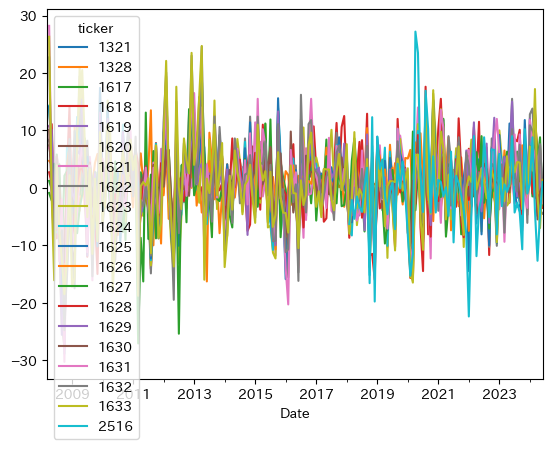

In [510]:
df_pivot.plot()

In [511]:
df_pivot = df_pivot.reset_index()
df_pivot

ticker,Date,1321,1328,1617,1618,1619,1620,1621,1622,1623,...,1625,1626,1627,1628,1629,1630,1631,1632,1633,2516
0,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-04-01,NaN,NaN,1.2,10.7,8.2,7.4,6.9,8.3,14.2,...,14.1,4.7,-0.9,2.7,10.8,10.1,28.2,22.7,26.3,NaN
2,2008-05-01,NaN,NaN,-0.2,11.1,10.1,3.9,7.9,4.2,6.9,...,6.0,4.1,-2.2,0.8,8.5,-1.0,-1.3,0.7,-1.6,NaN
3,2008-06-01,NaN,NaN,-2.8,-3.4,-6.5,-6.2,-4.1,-4.8,-8.6,...,-6.7,-2.9,4.2,0.2,-5.7,-5.3,-10.9,-11.0,-16.1,NaN
4,2008-07-01,NaN,NaN,5.8,-8.8,-3.7,-1.6,5.3,-6.0,1.2,...,-5.5,-1.2,3.6,-2.0,-5.9,5.5,2.4,1.1,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2024-02-01,8.0,1.5,-1.0,5.4,2.2,2.6,4.6,13.8,4.5,...,5.1,2.6,-1.5,-0.8,6.3,5.2,7.3,10.0,3.0,8.8
192,2024-03-01,3.6,12.3,2.9,13.7,7.5,3.8,-1.3,5.9,6.2,...,2.5,1.2,13.0,-1.8,6.3,4.6,5.8,8.9,17.2,-4.1
193,2024-04-01,-4.9,6.2,1.3,2.0,0.3,-1.2,1.2,-2.7,1.1,...,-1.3,-4.1,4.4,-1.5,5.2,-5.5,1.6,-0.7,-1.6,-12.7
194,2024-05-01,0.3,0.9,-0.5,3.9,-1.5,-0.0,0.0,-3.9,1.1,...,1.3,2.3,8.8,-1.1,-0.1,-0.7,7.4,7.6,-7.0,-4.4


In [512]:
df_pivot['year'] = df_pivot['Date'].dt.year

In [513]:
drop_columns = ['Date', 'year']
df_pivot_year = df_pivot.groupby('year')[[col for col in df_pivot.columns if col not in drop_columns]].sum()

In [514]:

df_pivot_year['max'] = df_pivot_year.max(axis=1)
df_pivot_year['min'] = df_pivot_year.min(axis=1)

In [515]:
df_pivot_year.reset_index(inplace=True)
df_pivot_year

ticker,year,1321,1328,1617,1618,1619,1620,1621,1622,1623,...,1627,1628,1629,1630,1631,1632,1633,2516,max,min
0,2008,0.0,0.0,-21.3,-21.7,-21.9,-27.7,0.1,-49.9,-47.1,...,8.4,-18.1,-55.1,-4.9,-23.7,-33.9,-36.0,0.0,8.4,-55.1
1,2009,29.5,18.3,4.7,-1.0,12.0,10.2,-8.7,45.3,23.6,...,-22.7,-18.0,23.7,-9.3,-29.4,-6.5,9.5,0.0,45.3,-29.4
2,2010,-0.9,11.6,-10.4,8.4,1.8,2.9,-4.6,-4.5,-3.9,...,-8.7,-3.3,4.9,0.5,0.1,-5.6,8.1,0.0,11.6,-10.4
3,2011,-17.4,10.9,1.5,-7.8,-9.7,-15.6,-6.5,-19.5,-36.6,...,-47.6,-10.8,-13.7,2.0,-22.6,-40.0,-26.8,0.0,10.9,-47.6
4,2012,24.0,15.0,18.4,1.0,23.5,10.0,12.9,37.8,13.9,...,-4.1,11.1,13.9,10.9,31.4,53.9,67.3,0.0,67.3,-4.1
5,2013,48.2,-13.4,36.0,22.3,42.8,36.7,36.9,48.2,47.2,...,35.3,35.5,27.9,47.6,46.1,56.3,60.3,0.0,61.1,-13.4
6,2014,9.5,8.5,17.9,-1.1,11.1,23.9,17.2,14.9,1.6,...,8.9,20.6,10.7,8.3,0.6,-1.1,-14.5,0.0,23.9,-14.5
7,2015,11.8,-6.2,26.0,1.8,17.4,15.3,31.4,7.8,-6.6,...,13.3,17.1,8.3,28.8,13.5,17.3,-1.3,0.0,31.4,-6.6
8,2016,4.0,0.2,-1.9,7.8,6.1,6.8,-8.1,-2.3,5.6,...,-10.2,-6.0,10.9,-4.2,1.1,3.3,-5.5,0.0,10.9,-10.2
9,2017,20.0,7.0,18.9,38.5,27.2,30.0,14.1,13.0,33.7,...,-2.2,12.2,29.6,17.1,11.4,12.5,4.5,0.0,38.5,-2.2


In [516]:
df_pivot_year.rename(columns={1321: '225',
                              1328: '円建て金',
                              1617: '食品',
                              1618: 'エネルギー資源',
                              1619: '建設_資材',
                              1620: '素材_化学',
                              1621: '医薬品',
                              1622: '自動車_輸送機',
                              1623: '鉄鋼_非鉄',
                              1624: '機械',
                              1625: '電機_精密',
                              1626: '情報通信_サービス',
                              1627: '電力_ガス',
                              1628: '運輸_物流',
                              1629: '商社_卸売',
                              1630: '小売',
                              1631: '銀行',
                              1632: '金融_除く銀行',
                              1633: '不動産',
                              2516: 'グロースコア'
                              }, inplace=True)

In [517]:

def find_matching_columns(row):
    matches = []
    for col in df_pivot_year.columns:
        # print(col)
        if row['max'] == row[col]:
            matches.append(col)
    return matches

df_pivot_year['match_max'] = df_pivot_year.apply(find_matching_columns, axis=1)



def find_matching_columns_min(row):
    matches = []
    for col in df_pivot_year.columns:
        # print(col)
        if row['min'] == row[col]:
            matches.append(col)
    return matches

df_pivot_year['match_min'] = df_pivot_year.apply(find_matching_columns_min, axis=1)

In [518]:
df_pivot_year['match_max'] = df_pivot_year['match_max'].apply(lambda x: str(x).split(',')[0].replace('[', ''))
df_pivot_year['match_min'] = df_pivot_year['match_min'].apply(lambda x: str(x).split(',')[0].replace('[', ''))

display(df_pivot_year[['match_max', 'match_min']], df_pivot_year)

ticker,match_max,match_min
0,'電力_ガス','商社_卸売'
1,'自動車_輸送機','銀行'
2,'円建て金','食品'
3,'円建て金','電力_ガス'
4,'不動産','電力_ガス'
5,'情報通信_サービス','円建て金'
6,'素材_化学','不動産'
7,'医薬品','鉄鋼_非鉄'
8,'商社_卸売','電力_ガス'
9,'エネルギー資源','電力_ガス'


ticker,year,225,円建て金,食品,エネルギー資源,建設_資材,素材_化学,医薬品,自動車_輸送機,鉄鋼_非鉄,...,商社_卸売,小売,銀行,金融_除く銀行,不動産,グロースコア,max,min,match_max,match_min
0,2008,0.0,0.0,-21.3,-21.7,-21.9,-27.7,0.1,-49.9,-47.1,...,-55.1,-4.9,-23.7,-33.9,-36.0,0.0,8.4,-55.1,'電力_ガス','商社_卸売'
1,2009,29.5,18.3,4.7,-1.0,12.0,10.2,-8.7,45.3,23.6,...,23.7,-9.3,-29.4,-6.5,9.5,0.0,45.3,-29.4,'自動車_輸送機','銀行'
2,2010,-0.9,11.6,-10.4,8.4,1.8,2.9,-4.6,-4.5,-3.9,...,4.9,0.5,0.1,-5.6,8.1,0.0,11.6,-10.4,'円建て金','食品'
3,2011,-17.4,10.9,1.5,-7.8,-9.7,-15.6,-6.5,-19.5,-36.6,...,-13.7,2.0,-22.6,-40.0,-26.8,0.0,10.9,-47.6,'円建て金','電力_ガス'
4,2012,24.0,15.0,18.4,1.0,23.5,10.0,12.9,37.8,13.9,...,13.9,10.9,31.4,53.9,67.3,0.0,67.3,-4.1,'不動産','電力_ガス'
5,2013,48.2,-13.4,36.0,22.3,42.8,36.7,36.9,48.2,47.2,...,27.9,47.6,46.1,56.3,60.3,0.0,61.1,-13.4,'情報通信_サービス','円建て金'
6,2014,9.5,8.5,17.9,-1.1,11.1,23.9,17.2,14.9,1.6,...,10.7,8.3,0.6,-1.1,-14.5,0.0,23.9,-14.5,'素材_化学','不動産'
7,2015,11.8,-6.2,26.0,1.8,17.4,15.3,31.4,7.8,-6.6,...,8.3,28.8,13.5,17.3,-1.3,0.0,31.4,-6.6,'医薬品','鉄鋼_非鉄'
8,2016,4.0,0.2,-1.9,7.8,6.1,6.8,-8.1,-2.3,5.6,...,10.9,-4.2,1.1,3.3,-5.5,0.0,10.9,-10.2,'商社_卸売','電力_ガス'
9,2017,20.0,7.0,18.9,38.5,27.2,30.0,14.1,13.0,33.7,...,29.6,17.1,11.4,12.5,4.5,0.0,38.5,-2.2,'エネルギー資源','電力_ガス'


In [519]:
del df_pivot_year['max'], df_pivot_year['min'], df_pivot_year['match_max'], df_pivot_year['match_min']

In [520]:
df_pivot_year.set_index('year', inplace=True)

In [521]:
trans_df = df_pivot_year.transpose()
rank_df = trans_df.rank(ascending=False).astype('int')

In [522]:
rank_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
ticker,,,,,,,,,,,,,,,,,
225,4,3,13,13,5,4,10,11,9,9,8,5,4,11,15,10,11
円建て金,4,7,1,1,9,20,12,19,12,17,4,8,6,14,6,15,6
食品,9,11,20,3,8,14,4,3,14,10,11,19,13,12,11,14,16
エネルギー資源,10,13,3,6,18,18,19,15,3,1,14,18,20,1,2,3,3
建設_資材,11,8,9,7,6,11,8,5,5,7,16,11,15,8,13,9,13
素材_化学,13,9,8,11,16,13,1,8,4,4,12,9,8,16,17,13,15
医薬品,2,15,17,5,12,12,5,1,19,12,2,4,9,18,5,19,14
自動車_輸送機,19,1,16,14,3,4,6,13,15,13,13,14,11,3,18,2,7
鉄鋼_非鉄,18,6,15,18,11,7,15,20,6,2,19,16,14,6,4,4,10


In [523]:
trans_df_res = trans_df.reset_index()

In [524]:
sort = pd.DataFrame()

for col in trans_df.columns:
    sort_c = trans_df_res[[col, 'ticker']].sort_values(by=col, ascending=False)
    sort_t = sort_c['ticker']
    sort_t = sort_t.rename(col).reset_index(drop=True)
    # break
    sort = pd.concat([sort, sort_t], axis=1)
    
display(sort)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,電力_ガス,自動車_輸送機,円建て金,円建て金,不動産,情報通信_サービス,素材_化学,医薬品,商社_卸売,エネルギー資源,電力_ガス,電機_精密,グロースコア,エネルギー資源,銀行,商社_卸売,金融_除く銀行
1,医薬品,電機_精密,機械,小売,金融_除く銀行,不動産,運輸_物流,小売,機械,鉄鋼_非鉄,医薬品,情報通信_サービス,電機_精密,商社_卸売,エネルギー資源,自動車_輸送機,銀行
2,225,225,エネルギー資源,食品,自動車_輸送機,金融_除く銀行,電機_精密,食品,エネルギー資源,機械,小売,機械,情報通信_サービス,自動車_輸送機,商社_卸売,エネルギー資源,エネルギー資源
3,円建て金,商社_卸売,不動産,グロースコア,銀行,225,食品,情報通信_サービス,素材_化学,素材_化学,円建て金,医薬品,225,銀行,鉄鋼_非鉄,鉄鋼_非鉄,電力_ガス
4,グロースコア,機械,商社_卸売,医薬品,225,自動車_輸送機,医薬品,建設_資材,建設_資材,電機_精密,運輸_物流,225,機械,電機_精密,医薬品,電機_精密,商社_卸売
5,小売,鉄鋼_非鉄,電機_精密,エネルギー資源,建設_資材,小売,自動車_輸送機,金融_除く銀行,鉄鋼_非鉄,商社_卸売,不動産,不動産,円建て金,金融_除く銀行,円建て金,銀行,円建て金
6,情報通信_サービス,円建て金,情報通信_サービス,建設_資材,機械,機械,機械,運輸_物流,電機_精密,建設_資材,商社_卸売,金融_除く銀行,小売,鉄鋼_非鉄,金融_除く銀行,電力_ガス,自動車_輸送機
7,運輸_物流,建設_資材,素材_化学,運輸_物流,食品,鉄鋼_非鉄,建設_資材,素材_化学,情報通信_サービス,情報通信_サービス,225,円建て金,素材_化学,建設_資材,電力_ガス,機械,機械
8,食品,素材_化学,建設_資材,情報通信_サービス,円建て金,銀行,商社_卸売,銀行,225,225,情報通信_サービス,素材_化学,医薬品,不動産,運輸_物流,建設_資材,不動産
9,エネルギー資源,不動産,小売,商社_卸売,商社_卸売,電機_精密,225,電力_ガス,金融_除く銀行,食品,金融_除く銀行,商社_卸売,商社_卸売,機械,小売,225,鉄鋼_非鉄


In [525]:
ci = pd.read_csv("C:\\Users\\user_a0068\\Documents\\景気先行指数.csv")

In [526]:
ci.rename(columns={'時点': 'date', '景気動向指数（先行）2020年基準': 'CI'}, inplace=True)
ci['date'] = pd.to_datetime(ci['date'], format='%Y年%m月')
ci['CI_変化率'] = (ci['CI'].shift(-1) - ci['CI']) / ci['CI']

In [527]:
ip = pd.read_csv("C:\\Users\\user_a0068\\Documents\\鉱工業生産.csv")
ip.rename(columns={'時点': 'date', '（季節調整値）鉱工業生産指数 2020年基準': 'ip'}, inplace=True)
ip['date'] = pd.to_datetime(ip['date'], format='%Y年%m月')
ip = ip[['date', 'ip']]

In [528]:
ci = ci[['date', 'CI', 'CI_変化率']]

In [531]:
economic = pd.merge(ci, ip, how='inner', on='date')
economic.set_index('date', inplace=True)

In [532]:
economic = economic.tail(300)

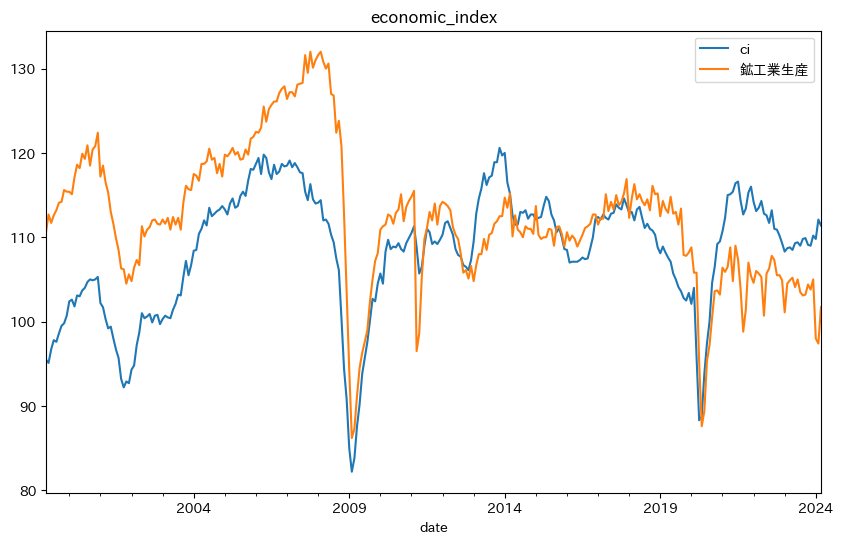

In [533]:
plt.figure(figsize=(10, 6))
economic['CI'].plot(label='ci')
economic['ip'].plot(label='鉱工業生産')

plt.title('economic_index')
plt.legend()

In [535]:
display(sort, rank_df)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,電力_ガス,自動車_輸送機,円建て金,円建て金,不動産,情報通信_サービス,素材_化学,医薬品,商社_卸売,エネルギー資源,電力_ガス,電機_精密,グロースコア,エネルギー資源,銀行,商社_卸売,金融_除く銀行
1,医薬品,電機_精密,機械,小売,金融_除く銀行,不動産,運輸_物流,小売,機械,鉄鋼_非鉄,医薬品,情報通信_サービス,電機_精密,商社_卸売,エネルギー資源,自動車_輸送機,銀行
2,225,225,エネルギー資源,食品,自動車_輸送機,金融_除く銀行,電機_精密,食品,エネルギー資源,機械,小売,機械,情報通信_サービス,自動車_輸送機,商社_卸売,エネルギー資源,エネルギー資源
3,円建て金,商社_卸売,不動産,グロースコア,銀行,225,食品,情報通信_サービス,素材_化学,素材_化学,円建て金,医薬品,225,銀行,鉄鋼_非鉄,鉄鋼_非鉄,電力_ガス
4,グロースコア,機械,商社_卸売,医薬品,225,自動車_輸送機,医薬品,建設_資材,建設_資材,電機_精密,運輸_物流,225,機械,電機_精密,医薬品,電機_精密,商社_卸売
5,小売,鉄鋼_非鉄,電機_精密,エネルギー資源,建設_資材,小売,自動車_輸送機,金融_除く銀行,鉄鋼_非鉄,商社_卸売,不動産,不動産,円建て金,金融_除く銀行,円建て金,銀行,円建て金
6,情報通信_サービス,円建て金,情報通信_サービス,建設_資材,機械,機械,機械,運輸_物流,電機_精密,建設_資材,商社_卸売,金融_除く銀行,小売,鉄鋼_非鉄,金融_除く銀行,電力_ガス,自動車_輸送機
7,運輸_物流,建設_資材,素材_化学,運輸_物流,食品,鉄鋼_非鉄,建設_資材,素材_化学,情報通信_サービス,情報通信_サービス,225,円建て金,素材_化学,建設_資材,電力_ガス,機械,機械
8,食品,素材_化学,建設_資材,情報通信_サービス,円建て金,銀行,商社_卸売,銀行,225,225,情報通信_サービス,素材_化学,医薬品,不動産,運輸_物流,建設_資材,不動産
9,エネルギー資源,不動産,小売,商社_卸売,商社_卸売,電機_精密,225,電力_ガス,金融_除く銀行,食品,金融_除く銀行,商社_卸売,商社_卸売,機械,小売,225,鉄鋼_非鉄


year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
ticker,,,,,,,,,,,,,,,,,
225,4,3,13,13,5,4,10,11,9,9,8,5,4,11,15,10,11
円建て金,4,7,1,1,9,20,12,19,12,17,4,8,6,14,6,15,6
食品,9,11,20,3,8,14,4,3,14,10,11,19,13,12,11,14,16
エネルギー資源,10,13,3,6,18,18,19,15,3,1,14,18,20,1,2,3,3
建設_資材,11,8,9,7,6,11,8,5,5,7,16,11,15,8,13,9,13
素材_化学,13,9,8,11,16,13,1,8,4,4,12,9,8,16,17,13,15
医薬品,2,15,17,5,12,12,5,1,19,12,2,4,9,18,5,19,14
自動車_輸送機,19,1,16,14,3,4,6,13,15,13,13,14,11,3,18,2,7
鉄鋼_非鉄,18,6,15,18,11,7,15,20,6,2,19,16,14,6,4,4,10


本当はここから、ティッカーごとの行するをそろえないと行けない  